<a href="https://colab.research.google.com/github/rohithn6736/Real-Estate/blob/main/Real_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real Estate Dataset
 The Dataset contains 1883 observations with 26 features. Each Observation contains the sale details of a property.

#Target variable
'tx_price' - Transaction price in USD.

#Problem
It is a regression problem, where given the set of features, we need to predict the transaction price of the house.

#Metrics Used
Since it is a regression problen, the following regression metrics are used:

*   Root Mean Squared Error

*   R-squared

*   Mean Absolute Error






##Import Libraries

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
import pickle as pkl


##Import data


In [82]:
np.set_printoptions(precision = 2,suppress=True) # 'precision' is used to specify the number of digits of precision for floating point output.
                                                 # 'suppress' is used to print floating point numbers using fixed point notation.

In [83]:
pd.set_option('display.max_columns', None) # To display all the columns of the pandas dataframe


In [84]:
df = pd.read_csv('real_estate_data.csv') # Importing the Dataset and displaying the first 5 rows
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


In [85]:
df.shape # Printing the shape of the dataframe

(1883, 26)

In [86]:
df.info() # index,columns,dtype,non-null values and memory usage of the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tx_price            1883 non-null   int64  
 1   beds                1883 non-null   int64  
 2   baths               1883 non-null   int64  
 3   sqft                1883 non-null   int64  
 4   year_built          1883 non-null   int64  
 5   lot_size            1883 non-null   int64  
 6   property_type       1883 non-null   object 
 7   exterior_walls      1660 non-null   object 
 8   roof                1529 non-null   object 
 9   basement            1657 non-null   float64
 10  restaurants         1883 non-null   int64  
 11  groceries           1883 non-null   int64  
 12  nightlife           1883 non-null   int64  
 13  cafes               1883 non-null   int64  
 14  shopping            1883 non-null   int64  
 15  arts_entertainment  1883 non-null   int64  
 16  beauty

In [87]:
df.describe() # Display summary statistics for the numerical features.

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


In [88]:
df.columns # Listing out all the columns of the dataframe.

Index(['tx_price', 'beds', 'baths', 'sqft', 'year_built', 'lot_size',
       'property_type', 'exterior_walls', 'roof', 'basement', 'restaurants',
       'groceries', 'nightlife', 'cafes', 'shopping', 'arts_entertainment',
       'beauty_spas', 'active_life', 'median_age', 'married', 'college_grad',
       'property_tax', 'insurance', 'median_school', 'num_schools', 'tx_year'],
      dtype='object')

In [89]:
df.describe(include=['O']) # Summary statistics for categorical features.

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


##Numerical Features Distribution

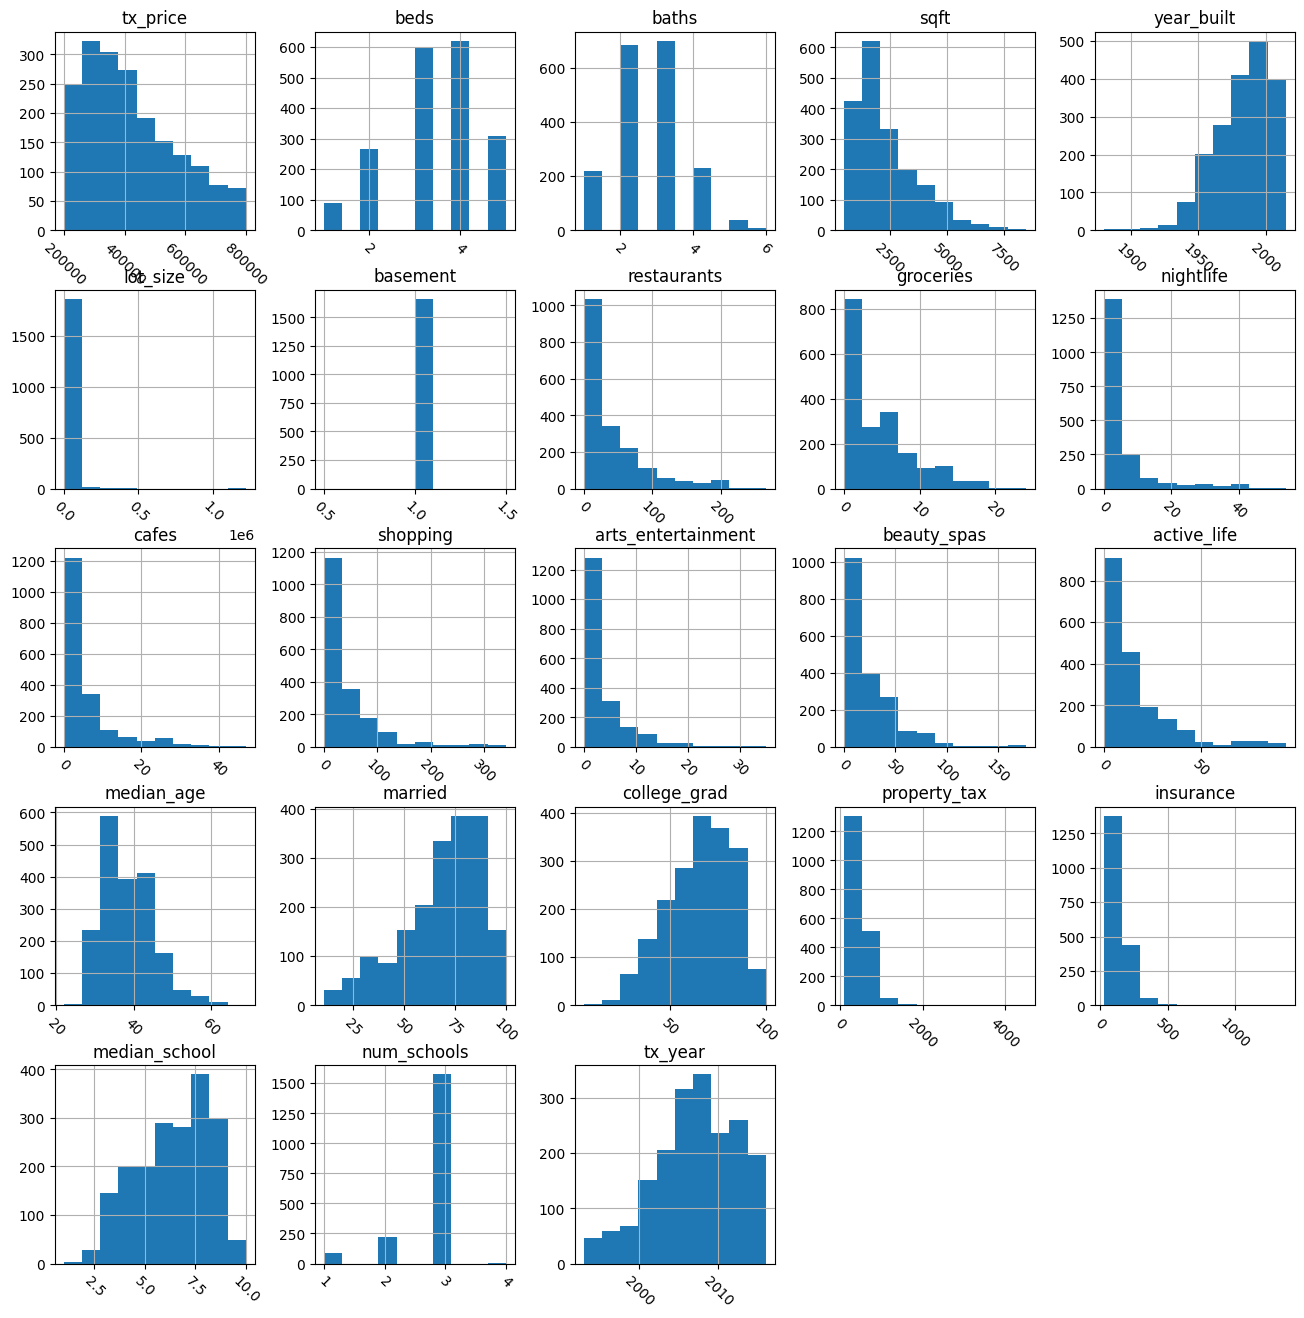

In [90]:
df.hist(figsize=(16,16),xrot=-45)
plt.show()

### **Observations**
*   A huge proportion of the properties have been sold between $200k and 400k.
*   Over 600 houses have 4 bedrooms.
*   Over 1500 houses have over 3 schools in their district.






## Distribution of categorical features

<Axes: xlabel='count', ylabel='exterior_walls'>

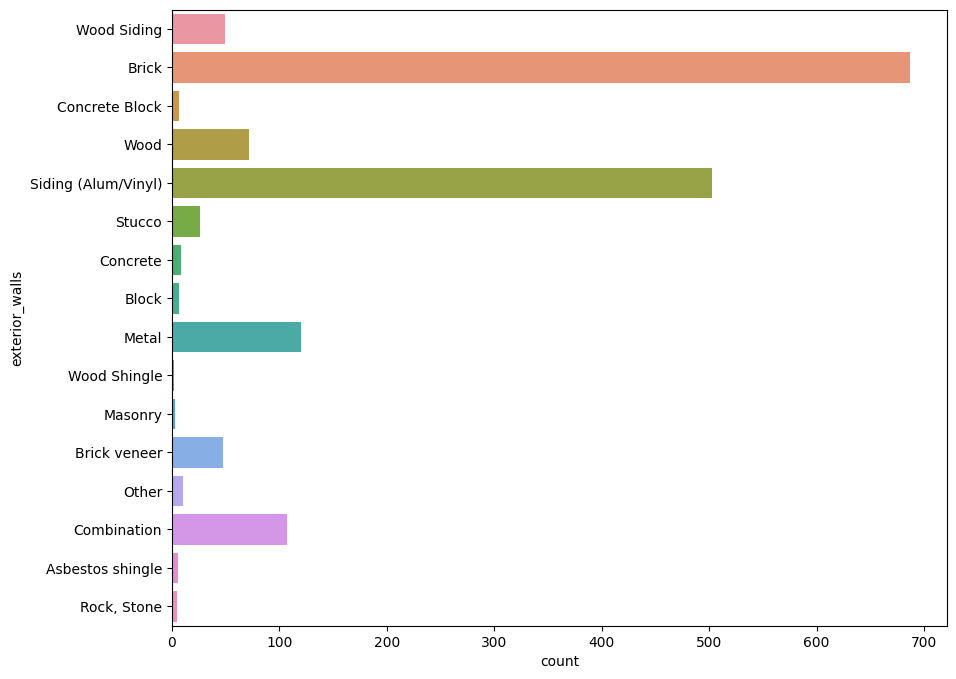

In [91]:
plt.figure(figsize=(10,8))
sns.countplot(y='exterior_walls', data=df)

### **Observations**:
*   Brick and Siding(Alum/Vinyl) are the most common classes.
*   There are many sparse classes.



<Axes: xlabel='count', ylabel='property_type'>

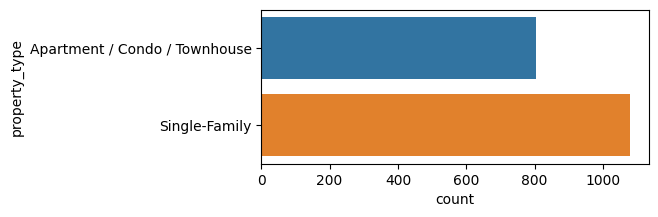

In [92]:
plt.figure(figsize=(5,2))
sns.countplot(y='property_type', data=df)

### **Observations**
*   Most of the properties are Single-Family properties.
*   There are no sparse classes.



<Axes: xlabel='count', ylabel='roof'>

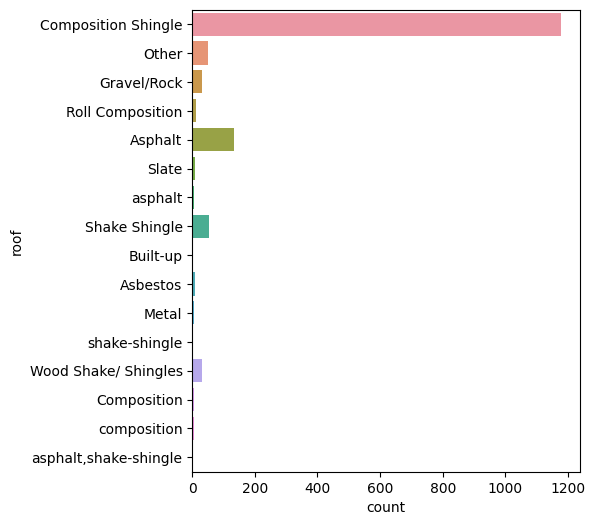

In [93]:
plt.figure(figsize=(5,6))
sns.countplot(y='roof', data=df)

###**Observations**
*   Composition shingle is the most common roof type.
*   Similar to exterior_walls roof also has multiple sparse classes.



## Categorical Features vs Numerical Features

<Axes: xlabel='tx_price', ylabel='property_type'>

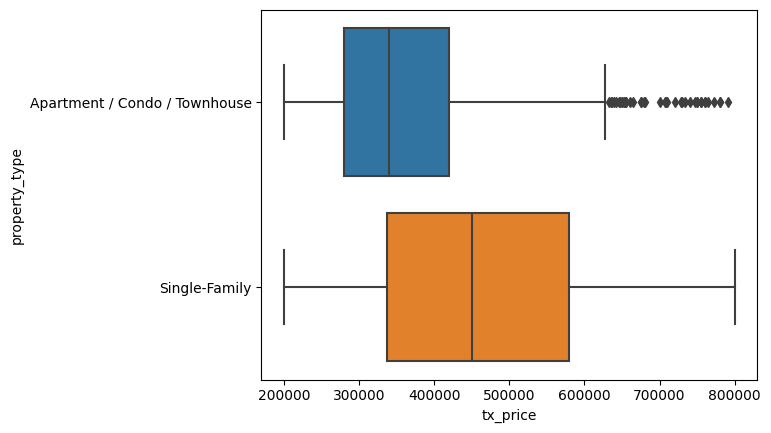

In [94]:
sns.boxplot(y='property_type', x='tx_price',data=df) #property type vs tx_price

###**Observations**
*   Single-Family properties tend to be more expensive.
*   Apartment/Condo/Townhouse seem to have many outliers.




In [95]:
df.groupby('property_type').median() #Comparing property types across all numerical features

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
property_type,,,,,,,,,,,,,,,,,,,,,,,
Apartment / Condo / Townhouse,340000.0,3.0,2.0,1428.0,1991.0,1424.0,1.0,42.0,5.0,4.0,5.0,36.0,3.0,26.0,14.0,35.0,62.0,69.0,321.0,96.0,7.0,3.0,2008.0
Single-Family,450000.0,4.0,3.0,2663.0,1980.0,10758.5,1.0,14.0,2.0,1.0,1.0,13.0,1.0,9.0,7.0,40.0,80.0,65.0,516.0,152.5,7.0,3.0,2007.0


<Axes: xlabel='sqft', ylabel='property_type'>

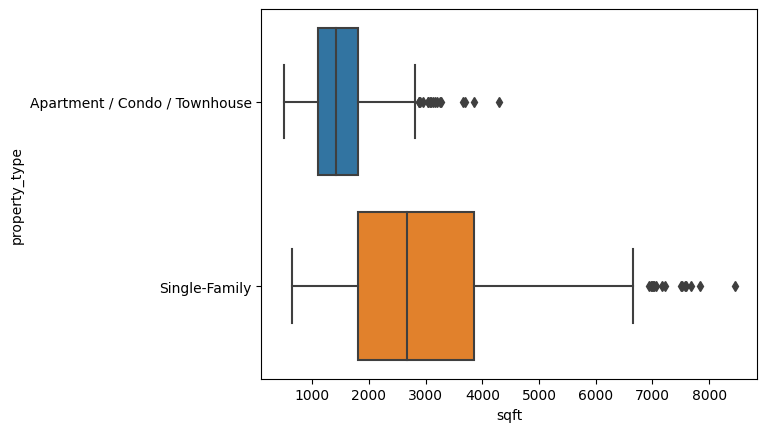

In [96]:
sns.boxplot(y='property_type',x='sqft',data=df) #property type vs sqft

###**Observations**
*   Single Family homes seem to be more bigger in area.
*   Outliers are present for both peroperty types.



##**Correlations**
* Correlation is used to observe the relationships among numeric features.
* ***Correlation*** is a value between -1 and 1 that represents how closely values for two separate features move in unison.
* Pearson coefficient is used to calculate the correlation.
* Positive correlation means that as one feature increases, the other increases; eg. a child's age and their height.
* Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.
* Correlations near -1 or 1 indicate a strong relationship.
* Those closer to 0 indicate a weak relationship.
* 0 indicates no relationship.

In [97]:
df.corr()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
tx_price,1.000000,0.384046,0.389375,0.469573,0.033138,0.130558,NaN,-0.038027,-0.094314,0.009361,-0.001398,-0.038246,-0.021076,-0.054349,-0.001165,0.126335,0.200494,0.268577,0.535148,0.532947,0.175762,-0.014380,0.108782
beds,0.384046,1.000000,0.644572,0.691039,-0.011844,0.164399,NaN,-0.495834,-0.421412,-0.440844,-0.464289,-0.388670,-0.442168,-0.419832,-0.486957,0.133711,0.643240,-0.082354,0.547643,0.485776,0.137309,-0.124359,-0.174081
baths,0.389375,0.644572,1.000000,0.682060,0.206141,0.132976,NaN,-0.350210,-0.340024,-0.306686,-0.316836,-0.259603,-0.305885,-0.282008,-0.329736,0.095844,0.442225,0.016097,0.525776,0.475430,0.163365,-0.088299,-0.132110
sqft,0.469573,0.691039,0.682060,1.000000,0.254589,0.246016,NaN,-0.353759,-0.371167,-0.281540,-0.300969,-0.275586,-0.293402,-0.310465,-0.332663,0.109811,0.480167,0.065343,0.660264,0.594049,0.220669,-0.102032,-0.236190
year_built,0.033138,-0.011844,0.206141,0.254589,1.000000,0.000068,NaN,-0.106948,-0.222443,-0.080006,-0.102209,-0.121684,-0.195141,-0.163670,-0.134919,-0.237152,0.038208,-0.014204,-0.046504,-0.109521,0.155835,-0.188106,-0.043301
lot_size,0.130558,0.164399,0.132976,0.246016,0.000068,1.000000,NaN,-0.113887,-0.118574,-0.072224,-0.098182,-0.116560,-0.067189,-0.121075,-0.092668,0.099140,0.122028,-0.030725,0.165800,0.146579,0.096551,-0.031535,-0.048207
basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurants,-0.038027,-0.495834,-0.350210,-0.353759,-0.106948,-0.113887,NaN,1.000000,0.701462,0.926675,0.937616,0.818815,0.726907,0.867829,0.881799,-0.063816,-0.615584,0.214260,-0.100821,-0.019925,-0.068425,0.251171,0.044739
groceries,-0.094314,-0.421412,-0.340024,-0.371167,-0.222443,-0.118574,NaN,0.701462,1.000000,0.565003,0.602857,0.526356,0.502837,0.626850,0.574532,-0.022377,-0.508793,-0.006025,-0.159506,-0.093974,-0.354553,0.272856,0.115674
nightlife,0.009361,-0.440844,-0.306686,-0.281540,-0.080006,-0.072224,NaN,0.926675,0.565003,1.000000,0.923901,0.743321,0.703038,0.777461,0.858836,-0.028611,-0.568811,0.253717,-0.054386,0.024551,-0.036948,0.196399,0.027495


<Axes: >

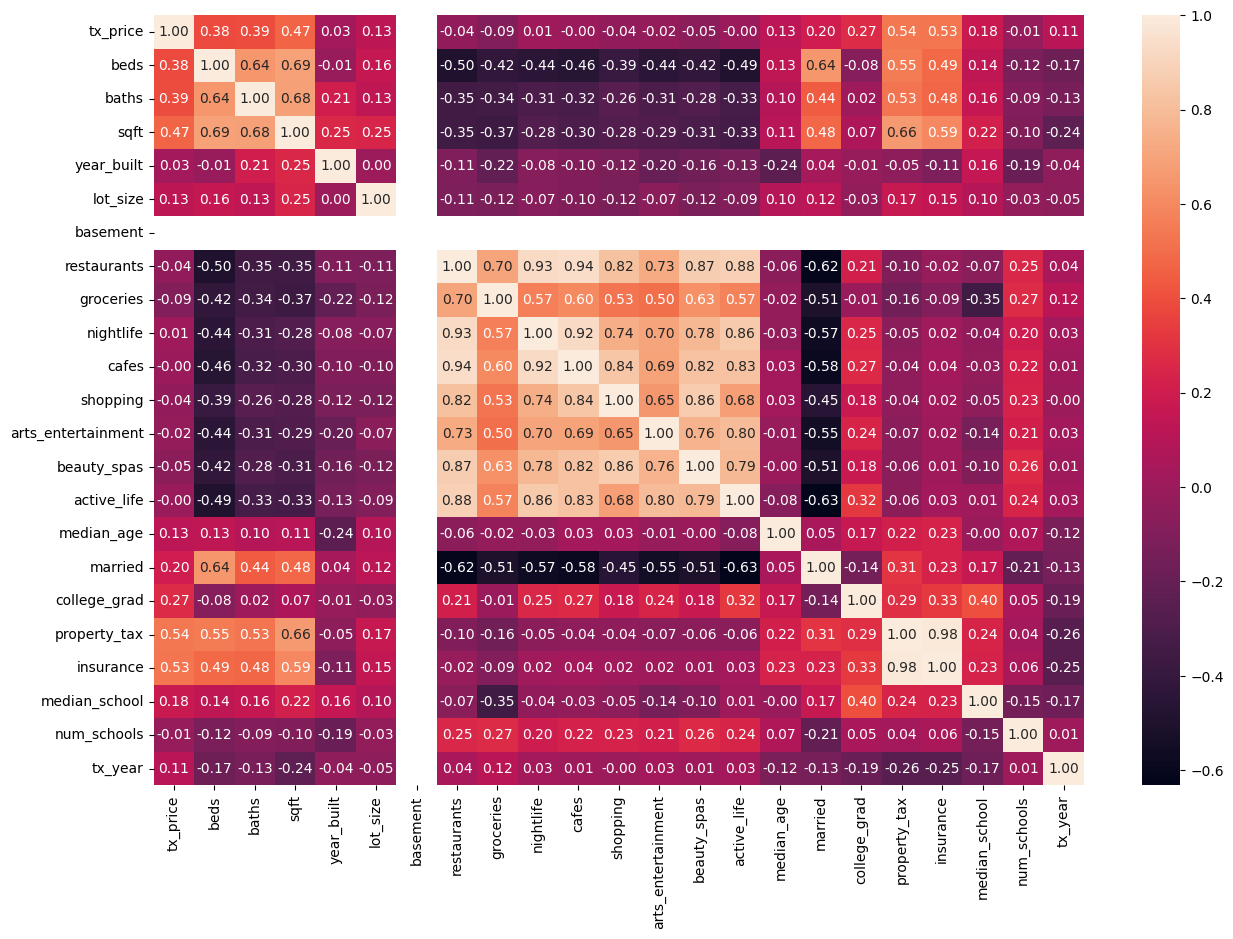

In [98]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True,fmt='.2f')

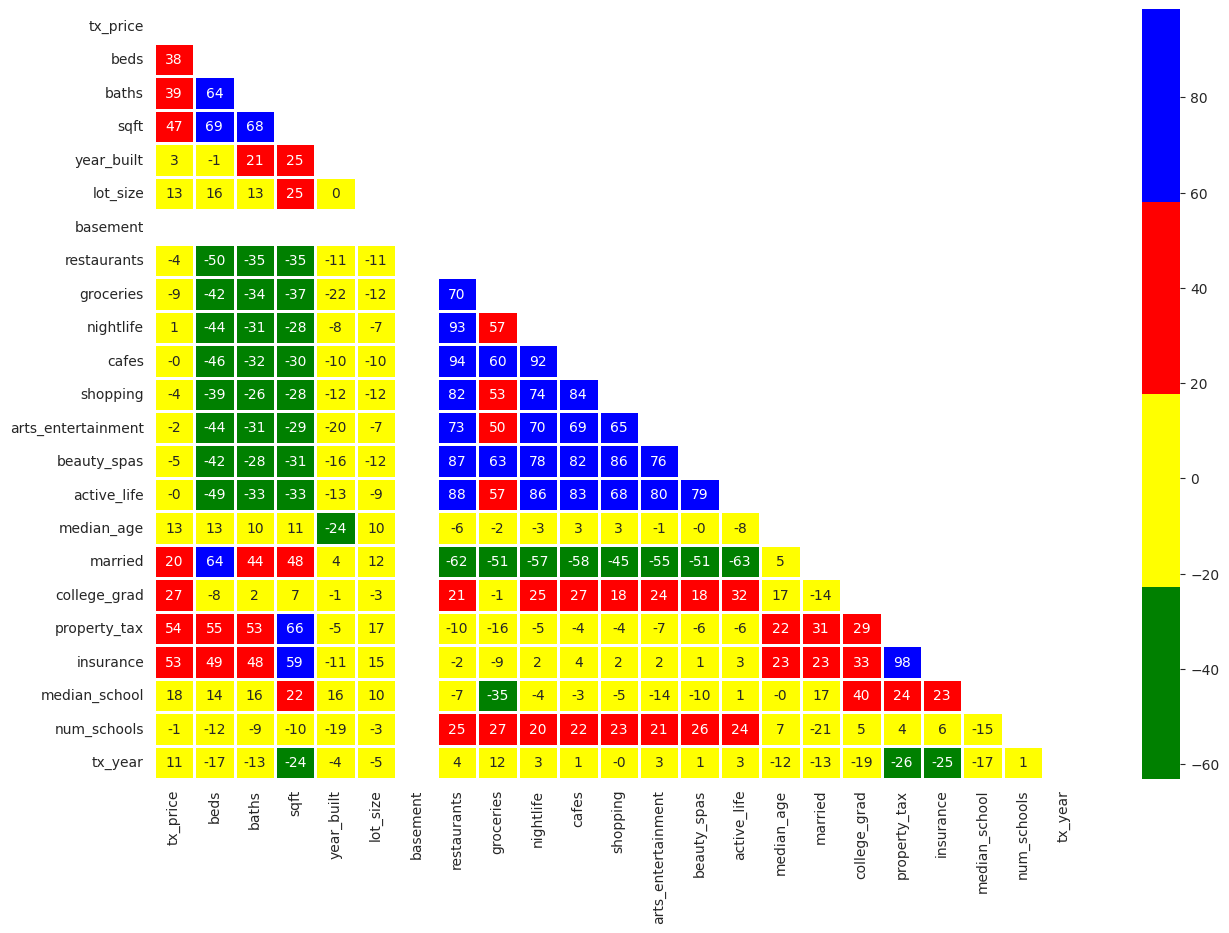

In [99]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (15,10))
with sns.axes_style('white'):
  ax = sns.heatmap(df.corr()*100,mask=mask,fmt='.0f',annot=True, lw=1, cmap=ListedColormap(['green','yellow','red','blue']))

##Data Cleaning

### Dropping Duplicates

In [100]:
df = df.drop_duplicates()
df.shape

(1883, 26)

No duplicates found.

###Fix structural errors

In [101]:
df['basement'].unique() #The nan values in basement indicate properties without basement.

array([nan,  1.])

In [102]:
df.basement.fillna(0, inplace=True) # Replacing the nan values with 0.

In [103]:
df.basement.unique()

array([0., 1.])

###Typos and capitalization

<Axes: xlabel='count', ylabel='roof'>

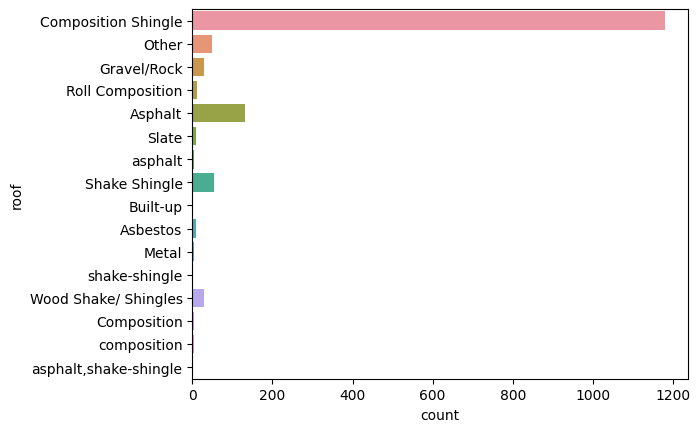

In [104]:
sns.countplot(y='roof', data=df)


* 'composition' should be 'Composition'
* 'asphalt' should be 'Asphalt'
* 'shake-shingle' should be 'Shake Shingle'
* 'asphalt,shake-shingle' could probably just be 'Shake Shingle'




In [105]:
df.roof.replace('composition','Composition', inplace=True)
df.roof.replace('asphalt','Asphalt',inplace=True)
df.roof.replace(['shake-shingle','asphalt,shake-shingle'],'Shake Shingle', inplace=True)

<Axes: xlabel='count', ylabel='roof'>

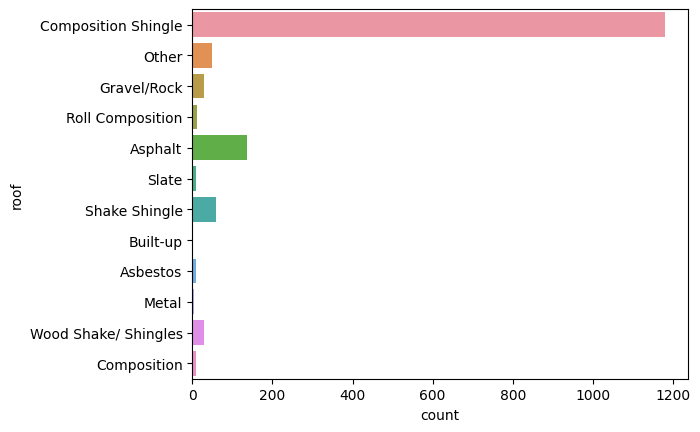

In [106]:
sns.countplot(y='roof', data=df) #After modifications

###Mislabeled Classes
*   'Rock, Stone' should be 'Masonry'
*   'Concrete' and 'Block' should both just be 'Concrete Block'




<Axes: xlabel='count', ylabel='exterior_walls'>

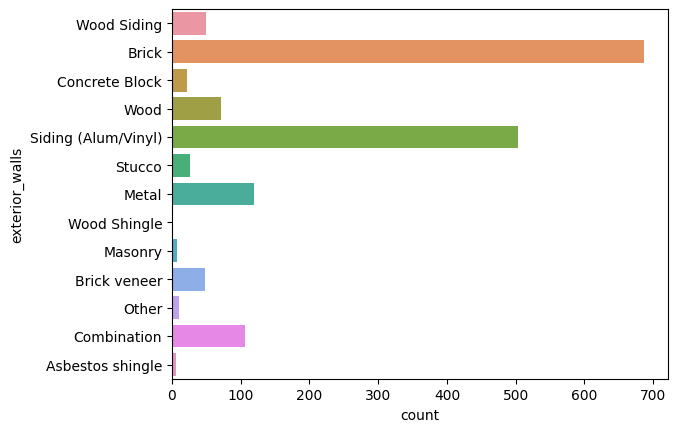

In [107]:
df.exterior_walls.replace(['Rock, Stone'],'Masonry', inplace=True)
df.exterior_walls.replace(['Concrete','Block'],'Concrete Block',inplace = True)
sns.countplot(y='exterior_walls',data=df) #After modifications

###Removing Outliers

<Axes: xlabel='tx_price'>

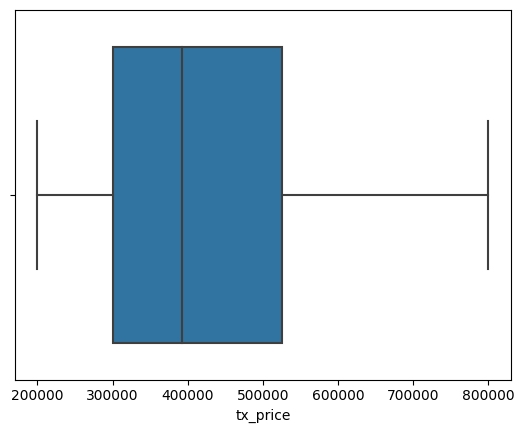

In [108]:
sns.boxplot(x = df.tx_price) #Checking outliers in tx_price

<Axes: xlabel='sqft'>

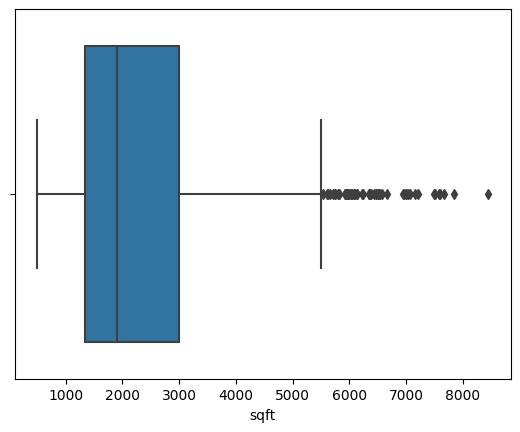

In [109]:
sns.boxplot(x = df.sqft) #Checking outliers in sqft

<Axes: xlabel='lot_size'>

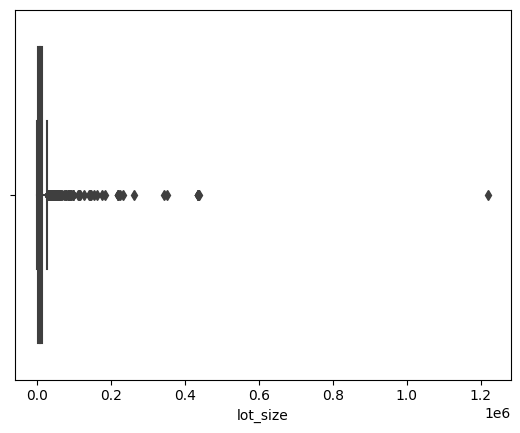

In [110]:
sns.boxplot(x = df.lot_size) #Checking outliers in lot size.

In [111]:
df['lot_size'].sort_values(ascending=False).head()

102     1220551
1111     436471
1832     436035
1876     436035
1839     435600
Name: lot_size, dtype: int64

The largest property has a lot_size of 1,220,551 sqft. The next largest has a lot_size of only 436,471 sqft. Eemoving it so it doesn't interfere with our ability to model rest of the properties.

In [112]:
df = df[df.lot_size <= 500000]
df.shape

(1882, 26)

<Axes: xlabel='lot_size'>

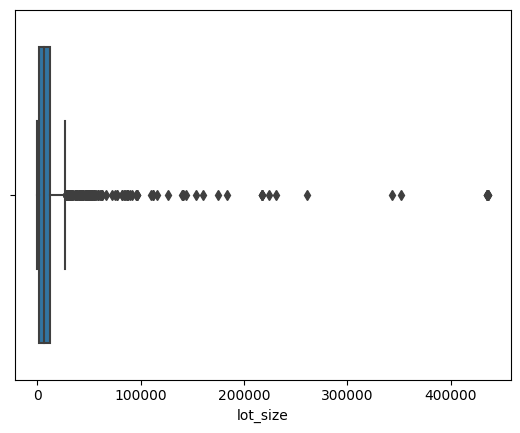

In [113]:
sns.boxplot(x = df.lot_size) #boxplot after the change

###Label missing categorical data

In [114]:
df.select_dtypes(include = ['object']).isnull().sum() #Exterior walls and roof have missing values

property_type       0
exterior_walls    223
roof              353
dtype: int64

In [115]:
#Filling the missing values with 'Missing'
df['exterior_walls'] = df['exterior_walls'].fillna('Missing')
df['roof'] = df['roof'].fillna('Missing')
df.select_dtypes(include=['object']).isna().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

###Checking missing values in numerical features.

In [116]:
df.select_dtypes(exclude='object').isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

No missing values for the numerical features

In [117]:
df.to_csv('cleaned_df',index=None)

##Feature Engineering

###Indicator variables

In [118]:
df['two_and_two'] = ((df.beds == 2) & (df.baths == 2)).astype(int) #Creating indicator variable for properties with 2 beds and 2 baths

In [119]:
df['two_and_two'].mean() #Almost 9.5% of the properties have 2 beds and 2 baths

0.09458023379383634

In [120]:
#Indicator variable to check if the transaction happened during 2007 to 2010 as the prices declined during the recession during this time.
df['during_recession'] = ((df.tx_year >= 2007) & (df.tx_year <= 2010)).astype(int)

In [121]:
df['during_recession'].mean() # 24.2% of the properties sold were between 2007-2010

0.24229543039319873

### Interaction features
*   Interaction features are operations between two or more other features.




In [122]:
#'property_age' denotes the age of the property when it was sold
df['property_age'] = df.tx_year - df.year_built

In [123]:
df[df['property_age'] < 0] # propertiess that were sold before completion of building

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,during_recession,property_age
406,280000,3,2,1040,2013,14810,Single-Family,Siding (Alum/Vinyl),Missing,1.0,28,5,2,0,14,1,22,6,40.0,47.0,5.0,211.0,59.0,3.5,2.0,2005,0,0,-8
1140,294996,4,2,3711,2003,7405,Single-Family,Siding (Alum/Vinyl),Composition Shingle,1.0,25,2,1,3,19,2,17,10,32.0,78.0,57.0,413.0,117.0,6.0,3.0,2002,0,0,-1
1459,461000,4,3,4301,2004,9583,Single-Family,Missing,Composition Shingle,1.0,42,1,6,1,33,2,30,11,28.0,65.0,60.0,616.0,158.0,7.0,3.0,2003,0,0,-1
1540,395000,4,4,4674,2015,9100,Single-Family,Stucco,Composition Shingle,1.0,13,3,2,5,19,1,22,12,36.0,47.0,83.0,1188.0,362.0,9.0,3.0,2014,0,0,-1
1556,300000,4,4,5800,2002,22215,Single-Family,Brick,Composition Shingle,1.0,1,0,0,0,2,0,1,2,47.0,81.0,79.0,1799.0,548.0,6.0,3.0,2000,0,0,-2
1572,540000,4,6,4418,2007,11325,Single-Family,Siding (Alum/Vinyl),Composition Shingle,1.0,70,6,9,14,122,2,43,17,29.0,75.0,45.0,868.0,264.0,8.0,3.0,2005,0,0,-2
1718,550000,5,3,4681,2006,11761,Single-Family,Combination,Composition Shingle,1.0,57,9,4,5,68,2,36,22,40.0,87.0,84.0,1200.0,349.0,9.0,3.0,2005,0,0,-1
1782,350000,5,4,4252,2010,22215,Single-Family,Other,Composition Shingle,1.0,47,7,2,5,25,1,17,7,33.0,46.0,63.0,739.0,225.0,4.0,3.0,2003,0,0,-7
1798,550000,5,4,4693,2006,16988,Single-Family,Brick,Composition Shingle,1.0,11,2,1,1,16,1,4,8,41.0,76.0,56.0,860.0,262.0,6.0,3.0,2005,0,0,-1
1809,400000,5,4,5003,2013,21344,Single-Family,Siding (Alum/Vinyl),Composition Shingle,1.0,45,5,4,6,77,7,73,19,41.0,80.0,78.0,1217.0,371.0,9.0,3.0,2012,0,0,-1


In [124]:
df = df[df.property_age >= 0] # Filtering the properties with property_age > 0

In [125]:
# 'school_score' denotes the product of number of schools and the median school score in the distict of the property.
df['school_score'] = df.num_schools * df.median_school

### Handling sparse classes

<Axes: xlabel='count', ylabel='exterior_walls'>

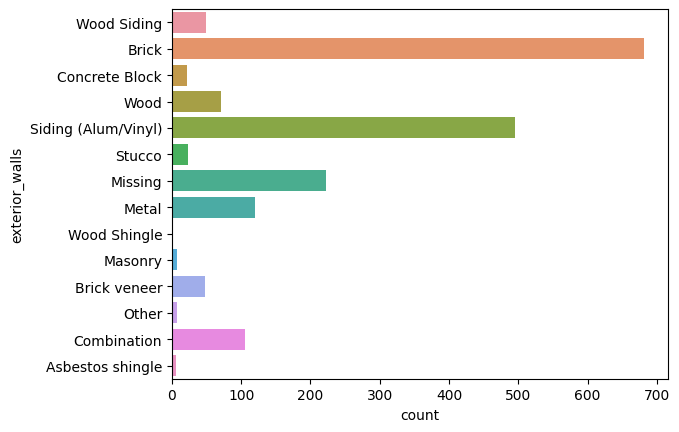

In [126]:
# Checking for 'exterior_walls'
sns.countplot(y='exterior_walls',data=df)


*   Combining 'Wood Siding', 'Wood Shingle', 'Wood' as 'Wood'
*   Combining 'Concrete Block', 'Stucco', 'Masonry', 'Other', 'Asbestos shingle' as 'Other'



In [127]:
df.exterior_walls.replace(['Wood Siding','Wood Shingle','Wood'], 'Wood', inplace=True)

In [128]:
other_exterior_walls = ['Concrete Block','Stucco','Masonry','Other','Asbestos shingle']
df.exterior_walls.replace(other_exterior_walls, 'Other', inplace=True)

<Axes: xlabel='count', ylabel='exterior_walls'>

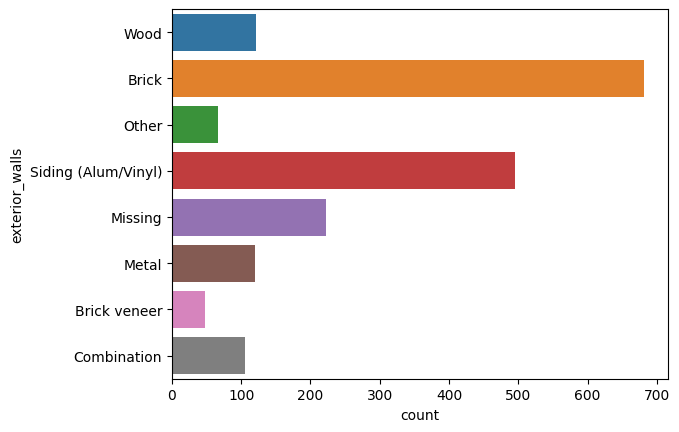

In [129]:
sns.countplot(y='exterior_walls', data=df) # After Changes

<Axes: xlabel='count', ylabel='roof'>

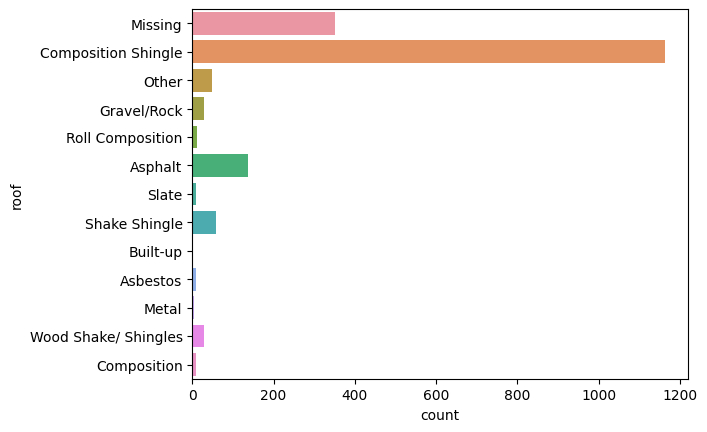

In [130]:
# Checking for 'roof'
sns.countplot(y='roof', data=df)


*   Combining 'Composition', 'Wood Shake/ Shingles' as 'Composition Shingle'
*   Combining 'Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal'



In [131]:
df.roof.replace(['Composition','Wood Shake/ Shingles'], 'Composition Shingle', inplace=True)

In [132]:
other_roof = ['Other','Gravel/Rock','Roll Composition','Slate','Built-up','Asbestos','Metal']
df.roof.replace(other_roof, 'Other', inplace=True)

<Axes: xlabel='count', ylabel='roof'>

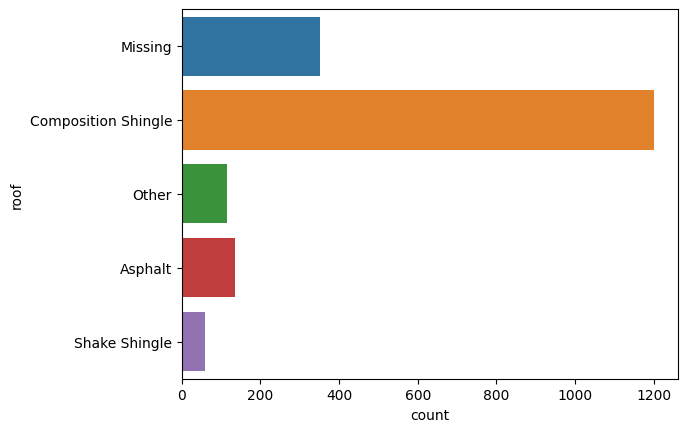

In [133]:
sns.countplot(y='roof',data=df) # After Changes

## Encode dummy variables (one hot encoding)

In [134]:
df = pd.get_dummies(df, columns = ['exterior_walls','roof','property_type'])

In [135]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,during_recession,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,2013,0,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,0,0,27.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,216500,1,1,612,1965,0,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0,41,9.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,279900,1,1,615,1963,0,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,0,49,24.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,379900,1,1,618,2000,33541,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0,5,27.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,340000,1,1,634,1992,0,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0,10,27.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


###Removed unused features

In [136]:
df = df.drop(['tx_year','year_built'],axis=1)

##Saving the dataframe after performing feature engineering

In [137]:
df.to_csv('analytical_base_table.csv',index=None)

## Machine Learning models

##Data Preparation

In [ ]:
df = pd.read_csv('analytical_base_table.csv')

In [138]:
df.shape

(1863, 40)

In [142]:
# Separating the dataframe into target variable and input features.
y = df.tx_price
X = df.drop('tx_price',axis = 1)

## Train and Test Splits

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

In [144]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1490, 39) (373, 39) (1490,) (373,)


## Data Standardization

In [145]:
train_mean = X_train.mean()
train_std = X_train.std()

In [146]:
X_train = (X_train - train_mean)/train_std

In [147]:
X_train.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,during_recession,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03
mean,-8.285691e-17,-1.692904e-16,7.153115e-17,-9.537486e-18,1.514076e-16,-1.907497e-17,1.096811e-16,9.537486e-18,4.768743e-18,-1.907497e-17,1.907497e-17,-5.722492e-17,1.430623e-17,-3.266589e-16,-1.883654e-16,-6.676240e-17,9.060612e-17,-7.033896e-17,1.859810e-16,2.384372e-16,4.530306e-17,6.437803e-17,-4.053432e-17,-1.525998e-16,-1.907497e-17,7.331943e-17,-4.291869e-17,4.768743e-18,-1.788279e-17,5.066790e-17,-5.364836e-17,1.251795e-17,-5.782101e-17,4.530306e-17,-2.384372e-17,3.338120e-17,-1.192186e-18,-1.430623e-17,1.430623e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.268801e+00,-1.697190e+00,-1.405276e+00,-3.662250e-01,-2.688343e+00,-8.405927e-01,-9.756023e-01,-5.928336e-01,-6.967768e-01,-7.559221e-01,-7.162235e-01,-8.905685e-01,-8.761722e-01,-2.495566e+00,-2.943413e+00,-3.511049e+00,-1.655736e+00,-1.532774e+00,-2.789591e+00,-3.439819e+00,-3.193783e-01,-5.663096e-01,-1.147796e+00,-2.315581e+00,-7.493115e-01,-1.572980e-01,-2.504503e-01,-2.652453e-01,-3.682115e-01,-1.975485e-01,-6.055792e-01,-2.652453e-01,-2.808475e-01,-1.343434e+00,-4.829980e-01,-2.534612e-01,-1.862765e-01,-8.497402e-01,-1.176040e+00
25%,-4.047185e-01,-6.224713e-01,-7.491974e-01,-3.219217e-01,3.717266e-01,-7.128947e-01,-7.532980e-01,-5.928336e-01,-6.967768e-01,-6.412758e-01,-7.162235e-01,-7.350745e-01,-6.539411e-01,-8.327346e-01,-5.271130e-01,-6.881804e-01,-6.304329e-01,-6.378058e-01,-7.645042e-01,4.268957e-01,-3.193783e-01,-5.663096e-01,-8.648971e-01,-9.206779e-01,-7.493115e-01,-1.572980e-01,-2.504503e-01,-2.652453e-01,-3.682115e-01,-1.975485e-01,-6.055792e-01,-2.652453e-01,-2.808475e-01,-1.343434e+00,-4.829980e-01,-2.534612e-01,-1.862765e-01,-8.497402e-01,-1.176040e+00
50%,5.273226e-01,4.522474e-01,-3.155383e-01,-1.885809e-01,3.717266e-01,-3.936498e-01,-3.086896e-01,-3.559228e-01,-2.936977e-01,-3.737676e-01,-2.901213e-01,-3.074659e-01,-3.205944e-01,-7.690215e-02,2.279809e-01,5.775901e-02,-1.683864e-01,-2.043054e-01,2.480391e-01,4.268957e-01,-3.193783e-01,-5.663096e-01,-2.048007e-01,9.257749e-03,-7.493115e-01,-1.572980e-01,-2.504503e-01,-2.652453e-01,-3.682115e-01,-1.975485e-01,-6.055792e-01,-2.652453e-01,-2.808475e-01,7.438617e-01,-4.829980e-01,-2.534612e-01,-1.862765e-01,-8.497402e-01,8.497402e-01
75%,5.273226e-01,4.522474e-01,5.334699e-01,-2.831904e-02,3.717266e-01,3.512552e-01,5.805274e-01,1.178989e-01,1.093814e-01,1.994641e-01,3.490321e-01,4.700041e-01,2.905410e-01,6.789303e-01,7.313768e

In [148]:
X_test = (X_test - train_mean)/train_std

In [149]:
X_test.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,during_recession,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,-0.117360,-0.080790,-0.090918,-0.032233,0.010753,0.091066,0.141283,0.056925,0.109381,0.132152,0.048019,0.107741,0.034946,0.072238,-0.100643,0.010077,-0.063649,-0.055431,-0.036315,0.121083,0.050419,0.002365,0.012619,0.032942,0.066008,0.052152,-0.045811,-0.027385,-0.004625,-0.042540,-0.025002,-0.005761,-0.002950,0.010790,-0.004068,0.027785,-0.052337,0.111555,-0.111555
std,0.958651,0.989343,1.001612,1.034313,0.988393,1.003586,0.996496,1.034407,1.077763,1.121003,1.013148,1.018536,0.922012,1.020545,0.949393,0.944916,0.889783,0.908482,1.042742,0.894708,1.068412,1.002423,0.972418,1.011310,1.017999,1.150338,0.910017,0.951364,0.995547,0.890424,0.987522,0.990833,0.996149,0.997703,0.997762,1.050725,0.852944,1.012934,1.012934
min,-2.268801,-1.697190,-1.261108,-0.366225,-2.688343,-0.840593,-0.975602,-0.592834,-0.696777,-0.755922,-0.716224,-0.890568,-0.876172,-1.739734,-2.842734,-2.691978,-1.396110,-1.295048,-2.789591,-3.439819,-0.319378,-0.566310,-1.147796,-2.315581,-0.749312,-0.157298,-0.250450,-0.265245,-0.368211,-0.197548,-0.605579,-0.265245,-0.280848,-1.343434,-0.482998,-0.253461,-0.186276,-0.849740,-1.176040
25%,-0.404719,-0.622471,-0.803935,-0.324824,0.371727,-0.627763,-0.753298,-0.474378,-0.562417,-0.564845,-0.716224,-0.657327,-0.542826,-0.681568,-0.678132,-0.702807,-0.652435,-0.665774,-0.764504,0.426896,-0.319378,-0.566310,-0.912047,-0.920678,-0.749312,-0.157298,-0.250450,-0.265245,-0.368211,-0.197548,-0.605579,-0.265245,-0.280848,-1.343434,-0.482998,-0.253461,-0.186276,-0.849740,-1.176040
50%,-0.404719,-0.622471,-0.386851,-0.266126,0.371727,-0.287235,-0.086385,-0.355923,-0.293698,-0.259121,-0.290121,-0.229719,-0.265037,-0.076902,0.076962,0.057759,-0.243194,-0.246257,0.248039,0.426896,-0.319378,-0.566310,-0.157651,0.009258,-0.749312,-0.157298,-0.250450,-0.265245,-0.368211,-0.197548,-0.605579,-0.265245,-0.280848,0.743862,-0.482998,-0.253461,-0.186276,-0.849740,0.849740
75%,0.527323,0.452247,0.306233,-0.062883,0.371727,0.500236,0.580527,0.117899,0.243741,0.333218,0.349032,0.586625,0.346099,0.678930,0.630698,0.759820,0.267258,0.271147,0.754311,0.426896,-0.319378,-0.566310,0.691044,0.939193,1.333663,-0.157298,-0.250450,-0.265245,-0.368211,-0.197548,1.650203,-0.265245,-0.280848,0.743862,-0.482998,-0.253461,-0.186276,1.176040,0.849740
max,1.459364,3.676403,4.127830,12.149022,0.371727,4.820685,3.915091,5.803759,5.349410,5.740705,6.740566,5.912295,4.012912,4.155760,1.536810,1.988426,4.790914,5.375263,1.766854,2.360253,3.128982,1.764633,3.284280,1.869129,1.333663,6.353092,3.990129,3.767565,2.714008,5.058652,1.650203,3.767565,3.558261,0.743862,2.069013,3.942729,5.364762,1.176040,0.849740


## Model 1 - Baseline Model

In [150]:
y_train_pred = np.ones(y_train.shape[0])*y_train.mean()

In [152]:
y_pred = np.ones(y_test.shape[0])*y_train.mean()

In [153]:
print('Train Results for Baseline Model')
print('*********************************')
print('Root mean squared error: ',sqrt(mse(y_train.values,y_train_pred)))
print('R-squared: ',r2_score(y_train.values,y_train_pred))
print('Mean Absolute Error: ',mae(y_train.values, y_train_pred))

Train Results for Baseline Model
*********************************
Root mean squared error:  153791.70506675562
R-squared:  0.0
Mean Absolute Error:  127271.7571712986


In [154]:
print('Results for Baseline Model:')
print('****************************')
print('Root mean squared error :' , sqrt(mse(y_test.values,y_pred)))
print('R-squared: ',r2_score(y_test.values,y_pred))
print('Mean Absolute Error',mae(y_test.values,y_pred))

Results for Baseline Model:
****************************
Root mean squared error : 143268.37228905046
R-squared:  -0.007318816013877294
Mean Absolute Error 120855.475979272


##Model-2 Ridge Regression

In [155]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [156]:
model.best_estimator_

Ridge(alpha=100)

In [157]:
y_train_pred = model.predict(X_train)

In [158]:
y_pred = model.predict(X_test)

In [159]:
print('Train Results for Ridge Regression:')
print("**********************************")
print('Root mean squared error: ', sqrt(mse(y_train, y_train_pred)))
print('R-squared: ', r2_score(y_train, y_train_pred))
print('Mean Absolute Error: ', mae(y_train, y_train_pred))

Train Results for Ridge Regression:
**********************************
Root mean squared error:  119506.49978826706
R-squared:  0.3961664641257874
Mean Absolute Error:  93206.76593278364


In [160]:
print('Test Results for Ridge Regression:')
print("**********************************")
print('Root mean squared error: ', sqrt(mse(y_test, y_pred)))
print('R-squared: ', r2_score(y_test, y_pred))
print('Mean Absolute Error: ', mae(y_test, y_pred))

Test Results for Ridge Regression:
**********************************
Root mean squared error:  109903.80406559087
R-squared:  0.4072224569528877
Mean Absolute Error:  85276.03511571862


##Feature Importance

In [161]:
model = Ridge(alpha=100)
model.fit(X_train, y_train)

Ridge(alpha=100)

In [162]:
indices = np.argsort(-abs(model.coef_))
print('The features in order of importance are:')
print(50*'-')
for feature in X.columns[indices]:
  print(feature)

The features in order of importance are:
--------------------------------------------------
sqft
college_grad
property_tax
insurance
baths
beds
beauty_spas
cafes
during_recession
restaurants
shopping
groceries
lot_size
exterior_walls_Wood
nightlife
exterior_walls_Missing
school_score
property_type_Single-Family
property_type_Apartment / Condo / Townhouse
exterior_walls_Combination
exterior_walls_Brick veneer
property_age
active_life
roof_Asphalt
num_schools
two_and_two
roof_Composition Shingle
exterior_walls_Brick
arts_entertainment
median_age
exterior_walls_Metal
roof_Shake Shingle
exterior_walls_Siding (Alum/Vinyl)
basement
married
roof_Missing
median_school
roof_Other
exterior_walls_Other


### Saving the model

In [163]:
pkl.dump(model, open('model.pkl','wb'))